In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os, time, random, cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.compat.v1.keras import backend as kerasb
import numpy as np

In [6]:
seed_value = 13
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
kerasb.set_session(sess)

In [7]:
def accuracy_function(y_true, y_pred):
  return kerasb.mean(kerasb.equal(kerasb.round(y_true), kerasb.round(y_pred)))

In [8]:
model_path = '/content/drive/MyDrive/monocular-depth-estimation-with-densenet/model/model.h5'

In [9]:
model = tf.keras.models.load_model(model_path, {'accuracy_function':accuracy_function}, compile=False)

In [10]:
def preprocess_original_image(image):
  processed = []
  resized_original_img = cv2.resize(image,(640, 480)).astype(np.float32)
  scaled_original_img = (resized_original_img - resized_original_img.min()) / (resized_original_img.max() - resized_original_img.min()) 
  processed.append(scaled_original_img)
  return np.array(processed)

Image size:  3000 x 4000


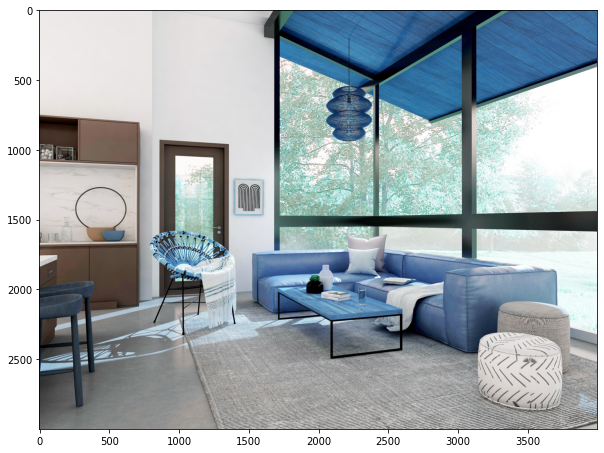

In [79]:
image_path = '/content/drive/MyDrive/monocular-depth-estimation-with-densenet/test_images/image_3000_x_4000.jpg'
image = cv2.imread(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
height, width = image.shape[0], image.shape[1]
print('Image size: ', height, 'x', width)
image_np = preprocess_original_image(image)

In [80]:
start = time.time()
depth_predictions = model.predict(image_np)
end = time.time()
print(end-start)

0.10866928100585938


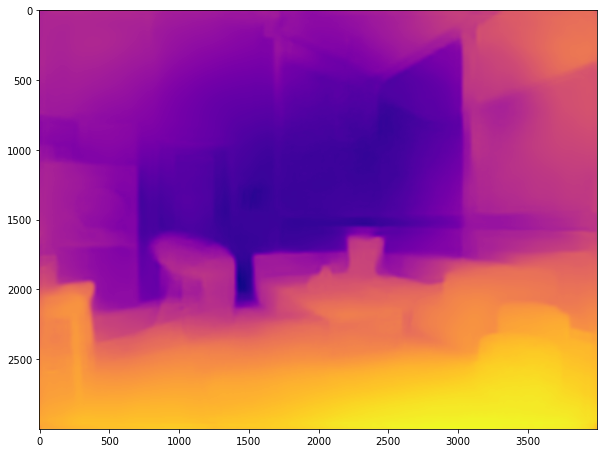

In [81]:
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
plt.figure(figsize=(10, 10))
plt.imshow(depth_image, cmap ='plasma_r')

In [63]:
start = time.time()
depth_predictions = model.predict(image_np)
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
end = time.time()
print(end-start)

0.11774826049804688


Image size:  3517 x 5274


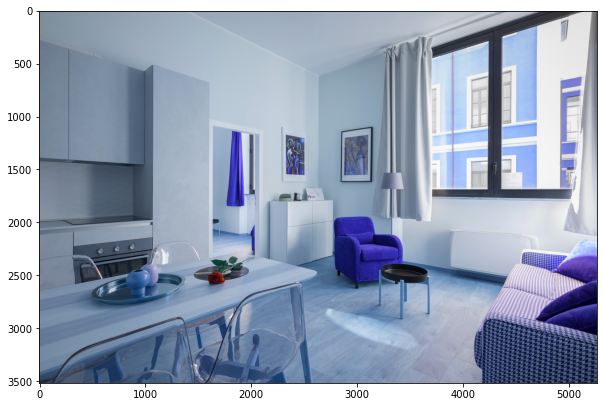

In [64]:
image_path = '/content/drive/MyDrive/monocular-depth-estimation-with-densenet/test_images/image_3517_x_5274.jpg'
image = cv2.imread(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
height, width = image.shape[0], image.shape[1]
print('Image size: ', height, 'x', width)
image_np = preprocess_original_image(image)

In [65]:
start = time.time()
depth_predictions = model.predict(image_np)
end = time.time()
print(end-start)

0.10690712928771973


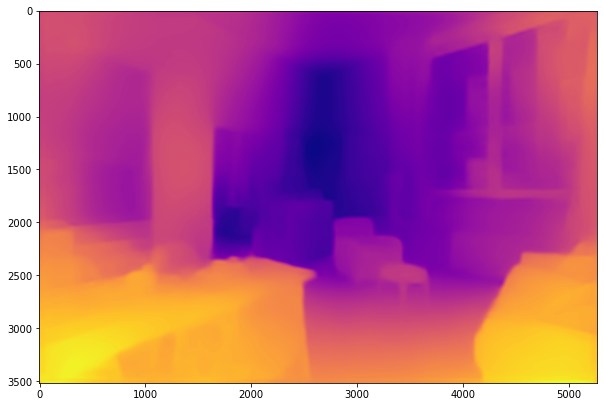

In [66]:
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
plt.figure(figsize=(10, 10))
plt.imshow(depth_image, cmap ='plasma_r')

In [67]:
start = time.time()
depth_predictions = model.predict(image_np)
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
end = time.time()
print(end-start)

0.1151115894317627


Image size:  4640 x 6960


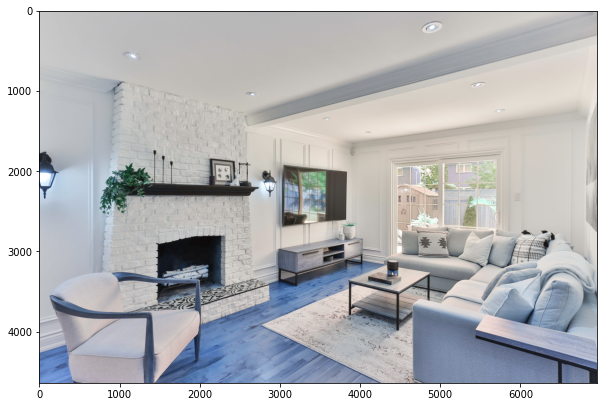

In [68]:
image_path = '/content/drive/MyDrive/monocular-depth-estimation-with-densenet/test_images/image_4640_x_6960.jpg'
image = cv2.imread(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
height, width = image.shape[0], image.shape[1]
print('Image size: ', height, 'x', width)
image_np = preprocess_original_image(image)

In [69]:
start = time.time()
depth_predictions = model.predict(image_np)
end = time.time()
print(end-start)

0.11496305465698242


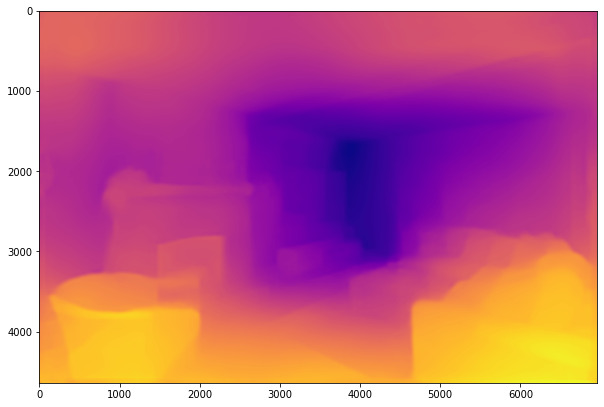

In [70]:
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
plt.figure(figsize=(10, 10))
plt.imshow(depth_image, cmap ='plasma_r')

In [78]:
start = time.time()
depth_predictions = model.predict(image_np)
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
end = time.time()
print(end-start)

0.11799931526184082
